Accepted values for nitrous oxide properties from NIST CHEMICAL WEBBOOK: https://webbook.nist.gov/cgi/fluid.cgi?T=284&PLow=4.5&PHigh=4.5005&PInc=.0001&Digits=5&ID=C10024972&Action=Load&Type=IsoTherm&TUnit=K&PUnit=MPa&DUnit=kg%2Fm3&HUnit=kJ%2Fmol&WUnit=m%2Fs&VisUnit=uPa*s&STUnit=N%2Fm&RefState=DEF

In [85]:

import numpy as np
import matplotlib.pyplot as plt
from thermo import Chemical
from thermo.eos import PR
import CoolProp.CoolProp as CP

# Global Constants:
R_U = 8.31446 #J/(mol K)
n2o_g = Chemical('nitrous oxide', T=298.15)
PC = n2o_g.Pc
TC = n2o_g.Tc
OMEGA = n2o_g.omega

MW = (n2o_g.MW/1000) #n2o.MW in g/mol --> converted to kg/mol
R_GAS_CONST = R_U/MW
KAPPA = 0.37464 + 1.5422*n2o_g.omega - 0.26992*n2o_g.omega**2
b = 0.07780*(R_U*TC/PC)
g = 9.81 #m/s^2

P_atm = 101325

print("imported libraries, MW FOR REF: ", MW)

imported libraries, MW FOR REF:  0.0440128


Check 0: Compare T_sat between Chemical and [7] Glenn Polynomial

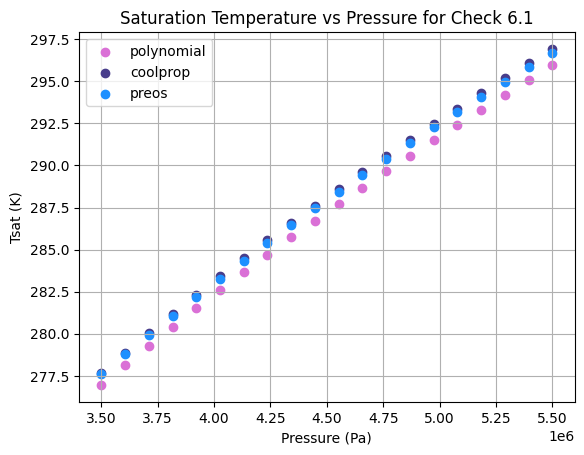

In [3]:
def T_sat_polynomial(P):
    A = 4.80716087
    B = 967.819748
    C = 19.6368887

    T_sat = B/(A -np.log10( P/100000) ) - C
    # Apply temperature limits
    if 140 < T_sat and T_sat < 310:
        return T_sat
    raise ValueError("Temperature outside of function bounds!")

T_REF = 298.15 #K

P_arr = np.linspace(3.5e6, 5.5e6, 20)
poly_t_sat_arr = []
cool_tsat_arr = []
preos_tsat_arr = []


for P in P_arr:

    poly_t_sat_arr.append( T_sat_polynomial(P) )
    cool_tsat_arr.append( CP.PropsSI('T', 'P', P, 'Q', 0, 'N2O') )
    preos_g = PR(Tc=TC, Pc=PC, omega=OMEGA, T=T_REF, P=P)
    preos_tsat_arr.append( preos_g.Tsat(P) )



plt.scatter(P_arr, poly_t_sat_arr, label = "polynomial", color = 'orchid')
plt.scatter(P_arr, cool_tsat_arr, label = "coolprop", color = 'darkslateblue')
plt.scatter(P_arr, preos_tsat_arr, label = "preos", color = 'dodgerblue')
plt.xlabel('Pressure (Pa)')
plt.ylabel('Tsat (K)')
plt.title('Saturation Temperature vs Pressure for Check 6.1')
plt.legend()
plt.grid(True)
plt.show()

    

Check 1: Compare cp ideal gas properties between Chemical and [7] Glenn Polynomial

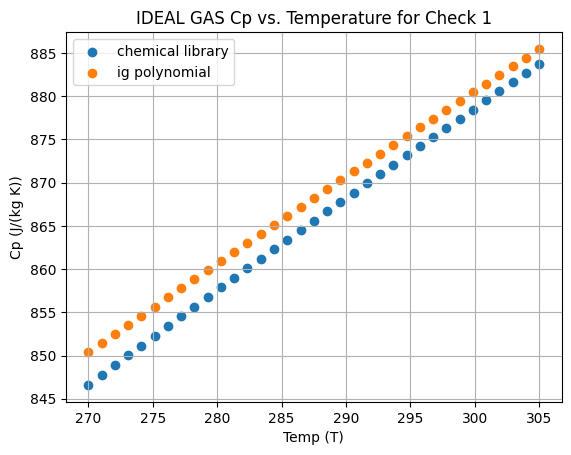

In [ ]:
def solve_cp_ig_polynomial(T):
    A = 21.62
    B = 72.81
    C = -57.78
    D = 18.3
    E = 0.0
    if 150<T and T<310:
        T_reduced = T/1000

        #NOTE: Thesis has this multiplied by a factor of 1000, but I think that is to convert MW because otherwise magnitude seems 1000x too big
        cp = (A + B*T_reduced + C*T_reduced**2 + D*T_reduced**3 + E/(T_reduced**2) ) / MW

        return cp #J/(kg K)
    raise ValueError("Temperature outside of function bounds!")


T_arr = np.linspace(270, 305, (305-270) )

cp_chemical_arr = []
cp_polynomial_arr = []


for T in T_arr:
    n2o_ig_for_cp = Chemical('N2O', T=T, P= 4e6)  #note ideal gas properties not f of Pressure this is just to initialize object
    cp_chemical_arr.append( n2o_ig_for_cp.Cpg )
    cp_polynomial_arr.append( solve_cp_ig_polynomial(T) )


plt.scatter(T_arr, cp_chemical_arr, label = "chemical library")
plt.scatter(T_arr, cp_polynomial_arr, label = "ig polynomial")
plt.xlabel('Temp (T)')
plt.ylabel('Cp (J/(kg K))')
plt.title('IDEAL GAS Cp vs. Temperature for Check 1')
plt.legend()
plt.grid(True)
plt.show()

Check 2.1: Compare real gas cp with (ig + PR_dep) to NIST cp
- Where NIST cp taken at P = 1 atm from 270K to 305K (entirely vapor phase)

for gas property: dep / ig:  (6.208020863691191, 850.3602792823907)
for gas property: dep / ig:  (6.106069717724641, 852.4290033444818)
for gas property: dep / ig:  (6.006532412722445, 854.4899392722118)
for gas property: dep / ig:  (5.909333463940405, 856.5431070234114)
for gas property: dep / ig:  (5.814400333078008, 858.5885265559112)
for gas property: dep / ig:  (5.721663290092215, 860.626217827541)
for gas property: dep / ig:  (5.63105528259104, 862.656200796132)
for gas property: dep / ig:  (5.5425118123239825, 864.6784954195144)
for gas property: dep / ig:  (5.45597081833371, 866.6931216555184)
for gas property: dep / ig:  (5.371372566352662, 868.7000994619748)
for gas property: dep / ig:  (5.288659544066529, 870.6994487967136)
for gas property: dep / ig:  (5.207776361885024, 872.6911896175659)
for gas property: dep / ig:  (5.128669658891774, 874.6753418823614)
for gas property: dep / ig:  (5.051288013660446, 876.6519255489313)
for gas property: dep / ig:  (4.975581859652108, 87

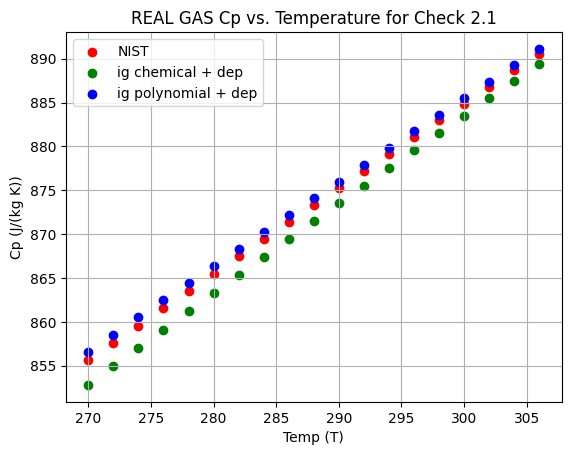

In [20]:
def solve_cp_ig_polynomial(T):
    A = 21.62
    B = 72.81
    C = -57.78
    D = 18.3
    E = 0.0
    if 150<T and T<310:
        T_reduced = T/1000

        #NOTE: Thesis has this multiplied by a factor of 1000, but I think that is to convert MW because otherwise magnitude seems 1000x too big
        cp = (A + B*T_reduced + C*T_reduced**2 + D*T_reduced**3 + E/(T_reduced**2) ) / MW

        return cp #J/(kg K)
    raise ValueError("Temperature outside of function bounds!")


P_step_2 = 101325 #Pa

temp_arr = [270,272,274,276,278,280,282,284,286,288,290,292,294,296,298,300,302,304,306]
cp_real_NIST_const_P_arr = [855.6,857.59,859.57,861.55,863.53,865.5,867.46,869.42,871.37,873.32,875.27,877.2,879.13,881.06,882.97,884.88,886.79,888.69,890.58,]
cp_chemical_arr = []
cp_poly_arr = []


for T in temp_arr:
    n2o_ig_step_2_chem= Chemical('N2O', T=T, P= P_atm) 
    n2o_ig_step_2_poly = solve_cp_ig_polynomial(T)
    preos_g_step_2 = PR(Tc=TC, Pc=PC, omega=OMEGA, T=T, P=P_step_2)
    cp_chemical_arr.append( (preos_g_step_2.Cp_dep_g/MW + n2o_ig_step_2_chem.Cpg) )
    cp_poly_arr.append( (preos_g_step_2.Cp_dep_g/MW + n2o_ig_step_2_poly) )

    print("for gas property: dep / ig: ", (preos_g_step_2.Cp_dep_g/MW, n2o_ig_step_2_poly))
    
plt.scatter(temp_arr, cp_real_NIST_const_P_arr, label = "NIST", color = 'r')
plt.scatter(temp_arr, cp_chemical_arr, label = "ig chemical + dep", color = 'g')
plt.scatter(temp_arr, cp_poly_arr, label = "ig polynomial + dep", color = 'b')
plt.xlabel('Temp (T)')
plt.ylabel('Cp (J/(kg K))')
plt.title('REAL GAS Cp vs. Temperature for Check 2.1')
plt.legend()
plt.grid(True)
plt.show()


Check 2.2: Compare real gas cp with (ig + PR_ref) to NIST cp
- Where NIST cp taken at P = 4 MPa from 270K to 305K (partially liq and vapor)
changes from liq (T= 283.14 K, cp= 2567.3 J/(kg K)) --> vap (T= 283.14 K, cp= 2133.9 J/(kg K)) 


for liq property: dep / ig:  (1489.692459776761, 850.3602792823907)
for liq property: dep / ig:  (1555.0501056602834, 852.4290033444818)
for liq property: dep / ig:  (1629.876504721629, 854.4899392722118)
for liq property: dep / ig:  (1716.6174290403112, 856.5431070234114)
for liq property: dep / ig:  (1818.7040068207612, 858.5885265559112)
for liq property: dep / ig:  (1941.128708012142, 860.626217827541)
for liq property: dep / ig:  (2091.4941212911235, 862.656200796132)
for gas property: dep / ig:  (767.2918624565831, 864.6784954195144)
for gas property: dep / ig:  (704.9330407631466, 866.6931216555184)
for gas property: dep / ig:  (652.6580450007147, 868.7000994619748)
for gas property: dep / ig:  (608.0845451153187, 870.6994487967136)
for gas property: dep / ig:  (569.5444649495274, 872.6911896175659)
for gas property: dep / ig:  (535.8311747107213, 874.6753418823614)
for gas property: dep / ig:  (506.04792245008224, 876.6519255489313)
for gas property: dep / ig:  (479.51287801354

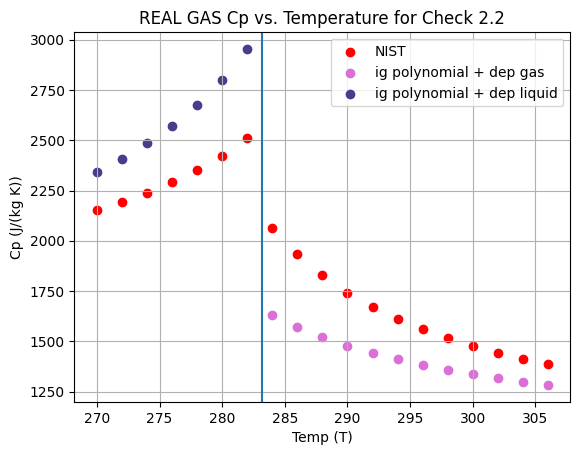

In [25]:
P_step_2 = 4e6 #Pa

temp_arr = [270,272,274,276,278,280,282,284,286,288,290,292,294,296,298,300,302,304,306]
cp_real_NIST_const_P_arr = [2153.2,2193.2,2238.6,2290.7,2351.3,2423,2509.5,2065.4,1933,1827.8,1742.1,1670.9,1610.8,1559.4,1515,1476.3,1442.2,1412.1,1385.2]

cp_solve_g_arr = []
cp_solve_l_arr = []
T_g_arr = []
T_l_arr = []

T_transition = 283.14

def solve_cp_ig_polynomial(T):
    # Polynomial coefficients
    A = 21.62
    B = 72.81
    C = -57.78  
    D = 18.3
    E = 0.0

    # Apply temperature limits
    if 150 < T and T < 310:
        T_reduced = T / 1000
        cp_ig = (A + B * T_reduced + C * T_reduced**2 + D * T_reduced**3 + E / (T_reduced**2)) / MW  # J/(kg K)
        return cp_ig
    raise ValueError("Temperature outside of function bounds!")


for T in temp_arr:
    n2o_ig_step_2= solve_cp_ig_polynomial(T)
    #print(TC, PC, OMEGA)
    preos_step_2 = PR(Tc=TC, Pc=PC, omega=OMEGA, T=T, P=P_step_2)
    

    if T > T_transition:
        cp_solve_g_arr.append( (preos_step_2.Cp_dep_g/MW + n2o_ig_step_2 ) )

        print("for gas property: dep / ig: ", (preos_step_2.Cp_dep_g/MW, n2o_ig_step_2))
        T_g_arr.append(T)

    else: 
        cp_solve_l_arr.append( (preos_step_2.Cp_dep_l/MW + n2o_ig_step_2) )

        print("for liq property: dep / ig: ", (preos_step_2.Cp_dep_l/MW, n2o_ig_step_2))
        T_l_arr.append(T)
    
plt.scatter(temp_arr, cp_real_NIST_const_P_arr, label = "NIST", color = 'r')
plt.scatter(T_g_arr, cp_solve_g_arr, label = "ig polynomial + dep gas", color = 'orchid')
plt.scatter(T_l_arr, cp_solve_l_arr, label = "ig polynomial + dep liquid", color = 'darkslateblue')

plt.axvline(T_transition)
plt.xlabel('Temp (T)')
plt.ylabel('Cp (J/(kg K))')
plt.title('REAL GAS Cp vs. Temperature for Check 2.2')
plt.legend()
plt.grid(True)
plt.show()

Check 2.3: Check 2.2 but at a higher pressure closer to the critical point!

for liq property: dep / ig:  (1385.1179063482346, 850.3602792823907)
for liq property: dep / ig:  (1434.8971495690664, 852.4290033444818)
for liq property: dep / ig:  (1490.4512624331269, 854.4899392722118)
for liq property: dep / ig:  (1552.9315440269997, 856.5431070234114)
for liq property: dep / ig:  (1623.837288137895, 858.5885265559112)
for liq property: dep / ig:  (1705.1632076355727, 860.626217827541)
for liq property: dep / ig:  (1799.6309360829432, 862.656200796132)
for liq property: dep / ig:  (1911.0677427940166, 864.6784954195144)
for liq property: dep / ig:  (2045.057399994388, 866.6931216555184)
for liq property: dep / ig:  (2210.128776042858, 868.7000994619748)
for liq property: dep / ig:  (2420.0994553385117, 870.6994487967136)
for liq property: dep / ig:  (2699.184864783898, 872.6911896175659)
for liq property: dep / ig:  (3094.7852887300614, 874.6753418823614)
for liq property: dep / ig:  (3716.760187571003, 876.6519255489313)
for gas property: dep / ig:  (1811.958160

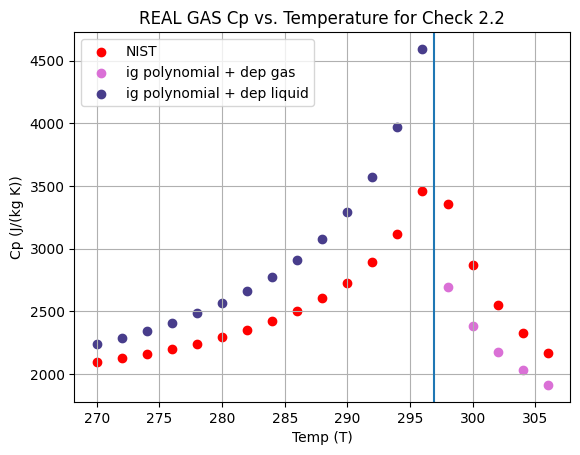

In [26]:
P_step_2 = 5.5e6 #Pa

temp_arr = [270,272,274,276,278,280,282,284,286,288,290,292,294,296,298,300,302,304,306]
cp_real_NIST_const_P_arr = [2091.820084,2123.462367, 2158.652484, 2198.076811, 2242.623877, 2293.467290, 2352.194269, 2421.012664, 2503.100012, 2603.225982, 2728.942657, 2893.075162, 3119.604028, 3460.187582, 3352.555384, 2865.538821, 2551.784526,	2329.915961, 2163.481180]

cp_solve_g_arr = []
cp_solve_l_arr = []
T_g_arr = []
T_l_arr = []

T_transition = 296.9248767

def solve_cp_ig_polynomial(T):
    # Polynomial coefficients
    A = 21.62
    B = 72.81
    C = -57.78  
    D = 18.3
    E = 0.0

    # Apply temperature limits
    if 150 < T and T < 310:
        T_reduced = T / 1000
        cp_ig = (A + B * T_reduced + C * T_reduced**2 + D * T_reduced**3 + E / (T_reduced**2)) / MW  # J/(kg K)
        return cp_ig
    raise ValueError("Temperature outside of function bounds!")


for T in temp_arr:
    n2o_ig_step_2= solve_cp_ig_polynomial(T)
    #print(TC, PC, OMEGA)
    preos_step_2 = PR(Tc=TC, Pc=PC, omega=OMEGA, T=T, P=P_step_2)
    

    if T > T_transition:
        cp_solve_g_arr.append( (preos_step_2.Cp_dep_g/MW + n2o_ig_step_2 ) )

        print("for gas property: dep / ig: ", (preos_step_2.Cp_dep_g/MW, n2o_ig_step_2))
        T_g_arr.append(T)

    else: 
        cp_solve_l_arr.append( (preos_step_2.Cp_dep_l/MW + n2o_ig_step_2) )

        print("for liq property: dep / ig: ", (preos_step_2.Cp_dep_l/MW, n2o_ig_step_2))
        T_l_arr.append(T)
    
plt.scatter(temp_arr, cp_real_NIST_const_P_arr, label = "NIST", color = 'r')
plt.scatter(T_g_arr, cp_solve_g_arr, label = "ig polynomial + dep gas", color = 'orchid')
plt.scatter(T_l_arr, cp_solve_l_arr, label = "ig polynomial + dep liquid", color = 'darkslateblue')

plt.axvline(T_transition)
plt.xlabel('Temp (T)')
plt.ylabel('Cp (J/(kg K))')
plt.title('REAL GAS Cp vs. Temperature for Check 2.2')
plt.legend()
plt.grid(True)
plt.show()

Check 3.1: Compare cv ideal gas properties between Chemical and [7] Glenn Polynomial
(note for ideal gas Cp - Cv = R_GAS_Const )

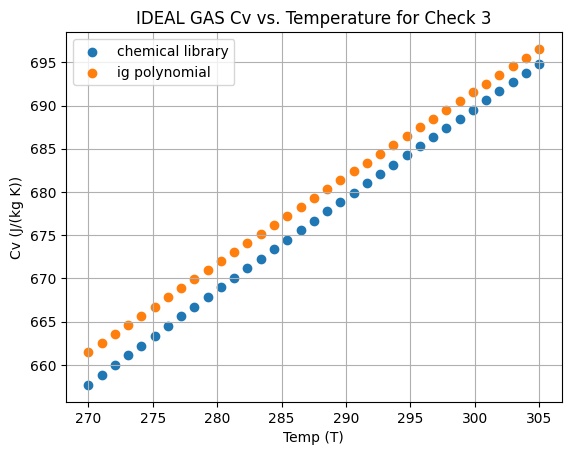

In [7]:
def solve_cv_ig_polynomial(T):
    A = 21.62
    B = 72.81
    C = -57.78
    D = 18.3
    E = 0.0
    if 150<T and T<310:
        T_reduced = T/1000

        #NOTE: Thesis has this multiplied by a factor of 1000, but I think that is to convert MW because otherwise magnitude seems 1000x too big
        cp = (A + B*T_reduced + C*T_reduced**2 + D*T_reduced**3 + E/(T_reduced**2) ) / MW
        cv = cp - R_GAS_CONST
        return cv #J/(kg K)
    raise ValueError("Temperature outside of function bounds!")


temp_arr = np.linspace(270, 305, (305-270) )

cv_chemical_arr = []
cv_polynomial_arr = []


for T in temp_arr:
    n2o_ig_for_cv = Chemical('N2O', T=T, P= 4e6) 
    cv_chemical_arr.append( n2o_ig_for_cv.Cvg )
    cv_polynomial_arr.append( solve_cv_ig_polynomial(T) )


plt.scatter(temp_arr, cv_chemical_arr, label = "chemical library")
plt.scatter(temp_arr, cv_polynomial_arr, label = "ig polynomial")
plt.xlabel('Temp (T)')
plt.ylabel('Cv (J/(kg K))')
plt.title('IDEAL GAS Cv vs. Temperature for Check 3')
plt.legend()
plt.grid(True)
plt.show()

Check 3.2: Compare real gas cv with (ig + PR_ref) to NIST cv
- Where NIST cv taken at P = 4 MPa from 270K to 305K (partially liq and vapor)
changes from liq (T= 283.14 K, cv= 916.95 J/(kg K)) --> vap (T= 283.14 K, cv= 923.2 J/(kg K)) 

for liq property: dep / ig:  (244.12058164980795, 661.4502349316564)
for liq property: dep / ig:  (240.28464320125167, 663.5189589937474)
for liq property: dep / ig:  (236.32877009372802, 665.5798949214775)
for liq property: dep / ig:  (232.2324786445857, 667.633062672677)
for liq property: dep / ig:  (227.96975503960587, 669.6784822051769)
for liq property: dep / ig:  (223.5066758850727, 671.7161734768067)
for liq property: dep / ig:  (218.7975304700132, 673.7461564453977)
for gas property: dep / ig:  (38.87366000780253, 675.7684510687801)
for gas property: dep / ig:  (37.83970488350869, 677.7830773047841)
for gas property: dep / ig:  (36.88831973335666, 679.7900551112405)
for gas property: dep / ig:  (36.00670779709843, 681.7894044459792)
for gas property: dep / ig:  (35.18497617161305, 683.7811452668316)
for gas property: dep / ig:  (34.41529667499297, 685.7652975316271)
for gas property: dep / ig:  (33.6913538218826, 687.741881198197)
for gas property: dep / ig:  (33.00796848100121

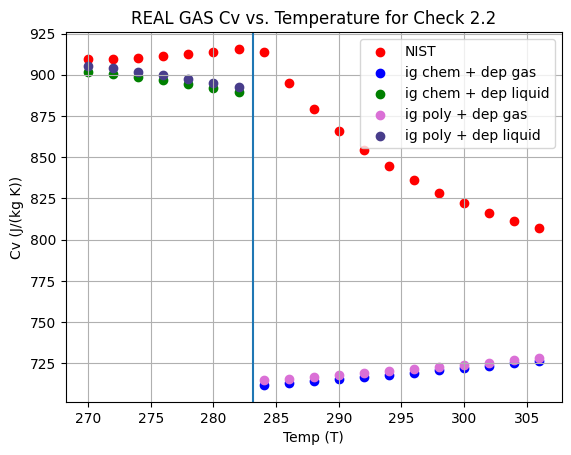

In [103]:
def solve_cv_ig_polynomial(T):
    A = 21.62
    B = 72.81
    C = -57.78
    D = 18.3
    E = 0.0
    if 150<T and T<310:
        T_reduced = T/1000

        #NOTE: Thesis has this multiplied by a factor of 1000, but I think that is to convert MW because otherwise magnitude seems 1000x too big
        cp = (A + B*T_reduced + C*T_reduced**2 + D*T_reduced**3 + E/(T_reduced**2) ) / MW
        cv = cp - R_GAS_CONST
        return cv #J/(kg K)
    raise ValueError("Temperature outside of function bounds!")

P_step_2 = 4e6 #Pa

temp_arr = [270,272,274,276,278,280,282,284,286,288,290,292,294,296,298,300,302,304,306]
cv_real_NIST_const_P_arr = [909.36,909.82,910.45,911.3,912.4,913.83,915.67,914.02,895.29,879.49,866.05,854.53,844.6,836.01,828.56,822.08,816.42,811.49,807.19,]

cv_chem_g_arr = []
cv_chem_l_arr = []

cv_poly_g_arr = []
cv_poly_l_arr = []

T_g_arr = []
T_l_arr = []

T_transition = 283.14


for T in temp_arr:
    n2o_ig_step_2= Chemical('N2O', T=T, P= P_step_2) 
    preos_step_2 = PR(Tc=TC, Pc=PC, omega=OMEGA, T=T, P=P_step_2)
    

    if T > T_transition:
        cv_chem_g_arr.append( (preos_step_2.Cv_dep_g/MW + n2o_ig_step_2.Cvg) )
        cv_poly_g_arr.append( (preos_step_2.Cv_dep_g/MW + solve_cv_ig_polynomial(T) ) )

        print("for gas property: dep / ig: ", (preos_step_2.Cv_dep_g/MW, solve_cv_ig_polynomial(T)) )
        T_g_arr.append(T)

    else: 
        cv_chem_l_arr.append( (preos_step_2.Cv_dep_l/MW + n2o_ig_step_2.Cvg) )
        cv_poly_l_arr.append( (preos_step_2.Cv_dep_l/MW + solve_cv_ig_polynomial(T) ) )

        print("for liq property: dep / ig: ", (preos_step_2.Cv_dep_l/MW, solve_cv_ig_polynomial(T)) )
        T_l_arr.append(T)
    
plt.scatter(temp_arr, cv_real_NIST_const_P_arr, label = "NIST", color = 'r')

plt.scatter(T_g_arr, cv_chem_g_arr, label = "ig chem + dep gas", color = 'b')
plt.scatter(T_l_arr, cv_chem_l_arr, label = "ig chem + dep liquid", color = 'g')

plt.scatter(T_g_arr, cv_poly_g_arr, label = "ig poly + dep gas", color = 'orchid')
plt.scatter(T_l_arr, cv_poly_l_arr, label = "ig poly + dep liquid", color = 'darkslateblue')

plt.axvline(T_transition)
plt.xlabel('Temp (T)')
plt.ylabel('Cv (J/(kg K))')
plt.title('REAL GAS Cv vs. Temperature for Check 2.2')
plt.legend()
plt.grid(True)
plt.show()

Check 4.1: Want to compare Chemical ideal gas enthalpy --> need to integrate cp polynomial to solve ideal gas enthalpy!

NOTE: CHEMICAL LIB USES T = 298.15 K, P = 101325 Pa AS REF STATE!

NOTE: IT SEEMS LIKE THE "IDEAL GAS ENTHALPY" FROM THE CHEMICAL LIB IS SENSITIVE TO CHANGES IN INPUT PRESSURE, AND DOES NOT SEEM TO REFLECT IDEAL GAS ENTHALPY!
THIS IS LIKELY A MISUSE, I SHOULD LIKELY USE THE POLYNOMIALS FOR IDEAL GAS!!!

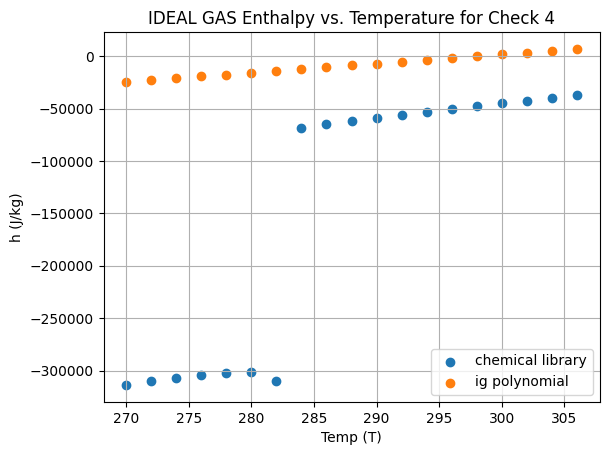

In [51]:
def solve_cp_ig_polynomial(T):
    # Polynomial coefficients
    A = 21.62
    B = 72.81
    C = -57.78  
    D = 18.3
    E = 0.0

    # Apply temperature limits
    if 150 < T and T < 310:
        T_reduced = T / 1000
        cp = (A + B * T_reduced + C * T_reduced**2 + D * T_reduced**3 + E / (T_reduced**2)) / MW  # J/(kg K)
        return cp
    raise ValueError("Temperature outside of function bounds!")

def integrate_polynomial_ig_enthalpy(T_REF, T):
    N = 1000  # Number of intervals for numerical integration
    dt = (T - T_REF) / N
    integral = 0
    for i in range(N):
        Ti = T_REF + i * dt
        Ti_next = Ti + dt
        # Midpoint for integration
        integral += solve_cp_ig_polynomial((Ti + Ti_next) / 2) * dt
    return integral


T_REF = 298.15  # Reference temperature (K)



temp_arr = [270,272,274,276,278,280,282,284,286,288,290,292,294,296,298,300,302,304,306]
polynomial_trapezoid_ig_enthalpy =[]
chemical_lib_ig_enthalpy = []

for T in temp_arr:
    n2o_ig_check_4 = Chemical('N2O', T=T, P= 4e6) 
    chemical_lib_ig_enthalpy.append( n2o_ig_check_4.H )
    polynomial_trapezoid_ig_enthalpy.append( integrate_polynomial_ig_enthalpy(T_REF, T) )


plt.scatter(temp_arr, chemical_lib_ig_enthalpy, label = "chemical library")
plt.scatter(temp_arr, polynomial_trapezoid_ig_enthalpy, label = "ig polynomial")
plt.xlabel('Temp (T)')
plt.ylabel('h (J/kg)')
plt.title('IDEAL GAS Enthalpy vs. Temperature for Check 4')
plt.legend()
plt.grid(True)
plt.show()




Check 4.2: Want to compare REAL FLUID ENTHALPY, so using ideal gas enthalpy + PR EOS departure enthalpy and comparing to NIST VALUES!!!
- Where NIST cv taken at P = 4 MPa from 270K to 305K (partially liq and vapor)
changes from liq (T= 283.14 K, h= 188.57 kJ/kg) --> vap (T= 283.14 K, h= 393.50 kJ/kg) 

NOTE: NIST ENTHALPY CONVENTION IS THE NORMAL BOILING POINT:

T_boiling = 182.5K for nitrous oxide

NOTE: IT SEEMS LIKE THE "IDEAL GAS ENTHALPY" FROM THE CHEMICAL LIB IS SENSITIVE TO CHANGES IN INPUT PRESSURE, AND DOES NOT SEEM TO REFLECT IDEAL GAS ENTHALPY!
THIS IS LIKELY A MISUSE, I SHOULD LIKELY USE THE POLYNOMIALS FOR IDEAL GAS!!!

n2o ref enthalpy:  -470186.19809950487
debugging liquid:  l/g -128195.57870544895 -284664.137819932 -313717.63898502185
debugging liquid:  l/g -121802.3442794091 -281620.8075804095 -310367.73479850445
debugging liquid:  l/g -115483.11244786013 -278437.6390005773 -307231.67154678766
debugging liquid:  l/g -109364.35325378884 -275093.3798500967 -304457.17150319705
debugging liquid:  l/g -103727.03186670906 -271560.9723992943 -302352.25756691967
debugging liquid:  l/g -99373.88778225292 -267805.0606798535 -301755.02520190435
debugging liquid:  l/g -103284.38832713751 -263777.92870423436 -309692.657722408
debugging gas:  l/g 344924.9784084738 -56966.373369107336 -68294.84632192377 470186.19809950487
debugging gas:  l/g 349591.4344787699 -55496.07944123961 -65098.68417949534 470186.19809950487
debugging gas:  l/g 354033.8269442221 -54139.94347195849 -62012.42768332425 470186.19809950487
debugging gas:  l/g 358287.40630688367 -52880.32833299894 -59018.46345962228 470186.19809950487
debugging

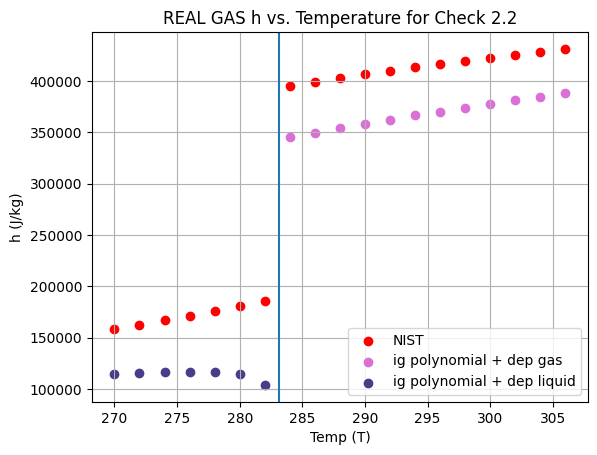

In [ ]:
P_step_4 = 4e6 #Pa

NIST_enthalpy_arr = [158030.0, 162380.0, 166810.0, 171340.0, 175980.0, 180750.0, 185680.0, 395310.0, 399300.0, 403060.0, 406630.0, 410040.0, 413320.0, 416490.0, 419560.0, 422550.0, 425470.0, 428320.0, 431120.0]

temp_arr = [270,272,274,276,278,280,282,284,286,288,290,292,294,296,298,300,302,304,306]

ig_dep_enthalpy_l_arr = []
ig_dep_enthalpy_g_arr = []
chem_enthalpy_l_arr = []
chem_enthalpy_g_arr = []

T_g_arr = []
T_l_arr = []

T_BOIL = 182.5

T_transition = 283.14
n2o_ig_ref= Chemical('N2O', T=T_BOIL, P= P_atm) 
#preos_step_4_ref_convers = PR(Tc=TC, Pc=PC, omega=OMEGA, T=T_BOIL, P=P_atm)
n2o_ref_convers = n2o_ig_ref.H #nist reference state is normal boiling point T_BOIL, P_atm

print("n2o ref enthalpy: ", n2o_ref_convers)

for T in temp_arr:
    n2o_ig_chem_4 = Chemical('N2O', T=T, P= P_step_4) 
    n2o_ig_step_4= Chemical('N2O', T=T, P= P_step_4) 
    preos_step_4 = PR(Tc=TC, Pc=PC, omega=OMEGA, T=T, P=P_step_4)
    

    if T > T_transition:


        ig_dep_enthalpy_g_arr.append( (preos_step_4.H_dep_g/MW + n2o_ig_step_4.H - n2o_ref_convers) )
        T_g_arr.append(T)
        print( "debugging gas: ", preos_step_4.phase, (preos_step_4.H_dep_g/MW + n2o_ig_step_4.H - n2o_ref_convers), preos_step_4.H_dep_g/MW , n2o_ig_step_4.H, - n2o_ref_convers)

    else: 


        ig_dep_enthalpy_l_arr.append( preos_step_4.H_dep_l/MW + n2o_ig_step_4.H  + preos_step_4.Hvap(T)/MW - n2o_ref_convers )
        T_l_arr.append(T)
        print( "debugging liquid: ", preos_step_4.phase, (preos_step_4.H_dep_l/MW + n2o_ig_step_4.H - n2o_ref_convers), preos_step_4.H_dep_l/MW , n2o_ig_step_4.H ) 
    
plt.scatter(temp_arr, NIST_enthalpy_arr, label = "NIST", color = 'r')
plt.scatter(T_g_arr, ig_dep_enthalpy_g_arr, label = "ig polynomial + dep gas", color = 'orchid')
plt.scatter(T_l_arr, ig_dep_enthalpy_l_arr, label = "ig polynomial + dep liquid", color = 'darkslateblue')
#plt.scatter(T_g_arr, chem_enthalpy_g_arr, label = "ig polynomial + dep gas", color = 'g')
#plt.scatter(T_l_arr, chem_enthalpy_l_arr, label = "ig polynomial + dep liquid", color = 'b')

plt.axvline(T_transition)
plt.xlabel('Temp (T)')
plt.ylabel('h (J/kg)')
plt.title('REAL GAS h vs. Temperature for Check 4.2')
plt.legend()
plt.grid(True)
plt.show()

Check 4.3: Compare numerical vs analytical integration for enthalpy

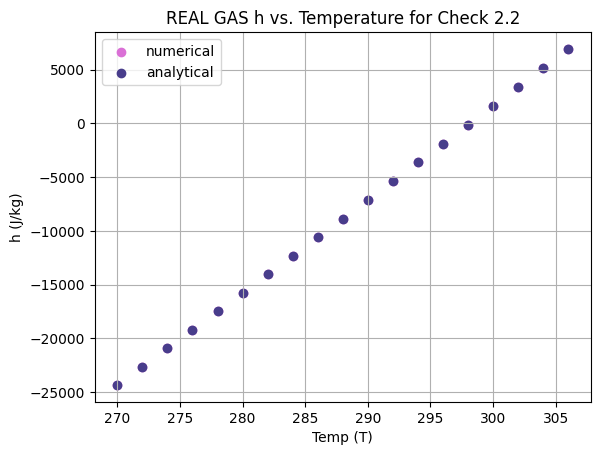

In [ ]:
def solve_cp_ig_polynomial(T):
    # Polynomial coefficients
    A = 21.62
    B = 72.81
    C = -57.78  
    D = 18.3
    E = 0.0

    # Apply temperature limits
    if 150 < T and T < 310:
        T_reduced = T / 1000
        cp = (A + B * T_reduced + C * T_reduced**2 + D * T_reduced**3 + E / (T_reduced**2)) / MW  # J/(kg K) - from [7] but modified because my MW in terms of kg not g
        return cp
    raise ValueError("Temperature outside of function bounds!")

def numerical_integration_cp_poly_ig_enthalpy(T_REF, T):
    N = 1000  # Number of intervals for numerical integration
    dt = (T - T_REF) / N
    integral = 0
    for i in range(N):
        Ti = T_REF + i * dt
        Ti_next = Ti + dt
        # Midpoint for integration
        integral += solve_cp_ig_polynomial((Ti + Ti_next) / 2) * dt
    return integral


def analytical_integration_cp_poly_ig_enthalpy(T_REF, T):
    # Polynomial coefficients
    A = 21.62
    B = 72.81
    C = -57.78  
    D = 18.3
    E = 0.0

    # Apply temperature limits
    if 150 < T and T < 310:
        h = (T*( (12E16)*E - T_REF**2*( (12E10)*A + (6E6)*B*T_REF + (4E3)*C*T_REF**2 + 3*D*T_REF**3)) + T_REF*(-(12E16)*E + T**2*( (12E10)*A + (6E6)*B*T + (4E3)*C*T**2 + 3*D*T**3)))/( (12E10)*MW*T*T_REF)
        h = (T*(12000000000000000*E - T_REF**2*(12000000000*A + 6000000*B*T_REF + 4000*C*T_REF**2 + 3*D*T_REF**3)) + T_REF*(-12000000000000000*E + T**2*(12000000000*A + 6000000*B*T + 4000*C*T**2 + 3*D*T**3)))/(12000000000*MW*T*T_REF)
        return h
    raise ValueError("Temperature outside of function bounds!")

temp_arr = [270,272,274,276,278,280,282,284,286,288,290,292,294,296,298,300,302,304,306]
h_numerical_arr = []
h_analytical_arr = []


for T in temp_arr:

    h_numerical_arr.append( numerical_integration_cp_poly_ig_enthalpy(T_REF, T) )
    h_analytical_arr.append( analytical_integration_cp_poly_ig_enthalpy(T_REF, T) )
        

plt.scatter(temp_arr, h_numerical_arr, label = "numerical", color = 'orchid')
plt.scatter(temp_arr, h_analytical_arr, label = "analytical", color = 'darkslateblue')

plt.xlabel('Temp (T)')
plt.ylabel('h (J/kg)')
plt.title('REAL GAS h vs. Temperature for Check 4.3')
plt.legend()
plt.grid(True)
plt.show()



Check 4.4: Checking the analytical ig integrated enthalpy + dep enthalpy with the NIST values

delta_h_convert_to_nist_convetion:  -60584.349879895955
-75234.09835901119 -14879.182197619324 60584.349879895955 369552.52967819234
difference:  27436.440459463076 percent error:  -17.361539239045165
-70659.35341160517 -13824.705814973368 60584.349879895955 369552.52967819234
difference:  27688.63383729462 percent error:  -17.051751347022183
-67322.55392952988 -12769.816466661048 60584.349879895955 369552.52967819234
difference:  27880.575909150095 percent error:  -16.713971529974277
-64629.89974985184 -11714.515708313502 60584.349879895955 369552.52967819234
difference:  28011.01600032192 percent error:  -16.34820590657285
-62346.75710445271 -10658.805091570186 60584.349879895955 369552.52967819234
difference:  28062.89793277622 percent error:  -15.946640489132982
-60352.17415283095 -9602.686164079114 60584.349879895955 369552.52967819234
difference:  28020.867285844317 percent error:  -15.502554514989942
-58574.288068731796 -8546.16046949661 60584.349879895955 369552.52967819234
dif

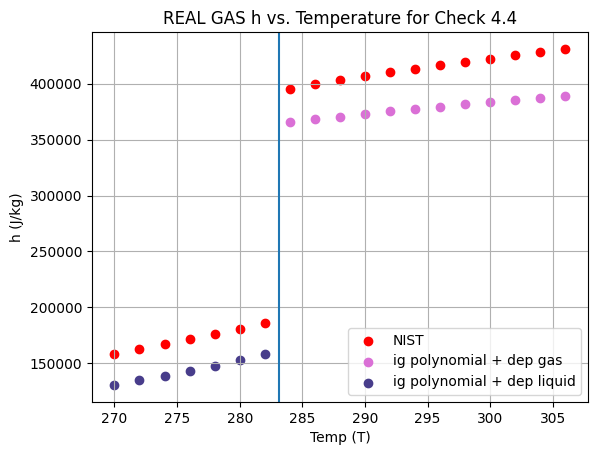

In [205]:
#NOTE: From [7] T_REF = 298.15 K AND P_REF = 1 atm
MW = (n2o_g.MW/1000) #n2o.MW in g/mol --> converted to kg/mol
T_REF = 298.15 #K
P_REF = 101325 #Pa

def solve_cp_ig_polynomial(T):
    # Polynomial coefficients
    A = 21.62
    B = 72.81
    C = -57.78  
    D = 18.3
    E = 0.0

    # Apply temperature limits
    if 150 < T and T < 310:
        T_reduced = T / 1000
        cp = (A + B * T_reduced + C * T_reduced**2 + D * T_reduced**3 + E / (T_reduced**2)) / MW  # J/(kg K) - from [7] but modified because my MW in terms of kg not g
        return cp
    raise ValueError("Temperature outside of function bounds!")

def analytical_integration_cp_poly_ig_enthalpy(T_REF, T):
    # Polynomial coefficients
    A = 21.62
    B = 72.81
    C = -57.78  
    D = 18.3
    E = 0.0

    # Apply temperature limits
    if 150 < T and T < 310:
        h = (T*( (12E16)*E - T_REF**2*( (12E10)*A + (6E6)*B*T_REF + (4E3)*C*T_REF**2 + 3*D*T_REF**3)) + T_REF*(-(12E16)*E + T**2*( (12E10)*A + (6E6)*B*T + (4E3)*C*T**2 + 3*D*T**3)))/( (12E10)*MW*T*T_REF) 
        return h
    raise ValueError("Temperature outside of function bounds!")




#NIST_enthalpy_arr = [ 395310.0, 399300.0, 403060.0, 406630.0, 410040.0, 413320.0, 416490.0, 419560.0, 422550.0, 425470.0, 428320.0, 431120.0] #J/kg
NIST_enthalpy_arr = [158030.0, 162380.0, 166810.0, 171340.0, 175980.0, 180750.0, 185680.0, 395310.0, 399300.0, 403060.0, 406630.0, 410040.0, 413320.0, 416490.0, 419560.0, 422550.0, 425470.0, 428320.0, 431120.0] #J/kg
#NOTE: NIST REFERENCE STATE IS NORMAL BOILING POINT: T_BOIL = 182.5, P_ATM = 101325
T_BOIL = 182.5

P_step_4 = 4e6 #Pa
T_transition = 283.14
#temp_arr = [284,286,288,290,292,294,296,298,300,302,304,306]
temp_arr = [270,272,274,276,278,280,282,284,286,288,290,292,294,296,298,300,302,304,306]
h_numerical_arr = []
h_analytical_arr = []


delta_h_convert_to_nist_convetion = -analytical_integration_cp_poly_ig_enthalpy(T_BOIL,T_REF)
print("delta_h_convert_to_nist_convetion: ", delta_h_convert_to_nist_convetion)


poly_enthalpy_l_arr = []
poly_enthalpy_g_arr = []

T_g_arr = []
T_l_arr = []

for T in temp_arr:
    preos_step_4 = PR(Tc=TC, Pc=PC, omega=OMEGA, T=T, P=P_step_4)
    

    if T > T_transition:

        h_poly = preos_step_4.H_dep_g/MW + analytical_integration_cp_poly_ig_enthalpy(T_REF,T) - delta_h_convert_to_nist_convetion + preos_step_4.Hvap(T_BOIL)/MW
        poly_enthalpy_g_arr.append( h_poly )

        T_g_arr.append(T)

        print( preos_step_4.H_dep_g/MW, analytical_integration_cp_poly_ig_enthalpy(T_REF,T), - delta_h_convert_to_nist_convetion, preos_step_4.Hvap(T_BOIL)/MW )
    
    
    else: 
        
        h_poly = preos_step_4.H_dep_l/MW + analytical_integration_cp_poly_ig_enthalpy(T_REF,T) - delta_h_convert_to_nist_convetion + preos_step_4.Hvap(T_BOIL)/MW
        poly_enthalpy_l_arr.append( h_poly )

        T_l_arr.append(T)

        print( preos_step_4.H_dep_g/MW, analytical_integration_cp_poly_ig_enthalpy(T_REF,T), - delta_h_convert_to_nist_convetion, preos_step_4.Hvap(T_BOIL)/MW )
        
    idx = temp_arr.index(T)
    h_nist = NIST_enthalpy_arr[idx]
    print("difference: ", h_nist - h_poly, "percent error: ", (h_poly - h_nist)/h_nist*100)

plt.scatter(temp_arr, NIST_enthalpy_arr, label = "NIST", color = 'r')
plt.scatter(T_g_arr, poly_enthalpy_g_arr, label = "ig polynomial + dep gas", color = 'orchid')
plt.scatter(T_l_arr, poly_enthalpy_l_arr, label = "ig polynomial + dep liquid", color = 'darkslateblue')


plt.axvline(T_transition)
plt.xlabel('Temp (T)')
plt.ylabel('h (J/kg)')
plt.title('REAL GAS h vs. Temperature for Check 4.4')
plt.legend()
plt.grid(True)
plt.show()


Check 4.5: Checking the analytical ig integrated enthalpy + dep enthalpy with the NIST values

delta_h_convert_to_nist_convetion:  60584.349879895955
-45088.566570187286 -14879.182197619324 60584.349879895955 369552.52967819234
difference:  73922.47000971832 percent error:  -16.645770799662085
-45088.566570187286 -13824.705814973368 60584.349879895955 369552.52967819234
difference:  74580.94692707236 percent error:  -16.729516610174162
-45088.566570187286 -12769.816466661048 60584.349879895955 369552.52967819234
difference:  75242.98677876004 percent error:  -16.813268096968706
-45088.566570187286 -11714.515708313502 60584.349879895955 369552.52967819234
difference:  75908.5834204125 percent error:  -16.897021893200137
-45088.566570187286 -10658.805091570186 60584.349879895955 369552.52967819234
difference:  76577.72980366915 percent error:  -16.980774522385918
-45088.566570187286 -9602.686164079114 60584.349879895955 369552.52967819234
difference:  77250.41827617807 percent error:  -17.064522456588623
-45088.566570187286 -8546.16046949661 60584.349879895955 369552.52967819234
d

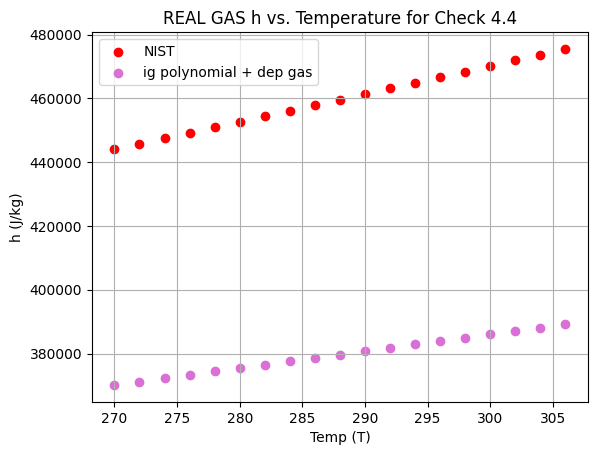

In [204]:
#NOTE: From [7] T_REF = 298.15 K AND P_REF = 1 atm
MW = (n2o_g.MW/1000) #n2o.MW in g/mol --> converted to kg/mol
T_REF = 298.15 #K
P_REF = 1E5 #Pa

def solve_cp_ig_polynomial(T):
    # Polynomial coefficients
    A = 21.62
    B = 72.81
    C = -57.78  
    D = 18.3
    E = 0.0

    # Apply temperature limits
    if 150 < T and T < 310:
        T_reduced = T / 1000
        cp = (A + B * T_reduced + C * T_reduced**2 + D * T_reduced**3 + E / (T_reduced**2)) / MW  # J/(kg K) - from [7] but modified because my MW in terms of kg not g
        return cp
    raise ValueError("Temperature outside of function bounds!")

def analytical_integration_cp_poly_ig_enthalpy(T_REF, T):
    # Polynomial coefficients
    A = 21.62
    B = 72.81
    C = -57.78  
    D = 18.3
    E = 0.0

    # Apply temperature limits
    if 150 < T and T < 310:
        h = (T*( (12E16)*E - T_REF**2*( (12E10)*A + (6E6)*B*T_REF + (4E3)*C*T_REF**2 + 3*D*T_REF**3)) + T_REF*(-(12E16)*E + T**2*( (12E10)*A + (6E6)*B*T + (4E3)*C*T**2 + 3*D*T**3)))/( (12E10)*MW*T*T_REF)
        #h = (T*(12000000000000000*E - T_REF**2*(12000000000*A + 6000000*B*T_REF + 4000*C*T_REF**2 + 3*D*T_REF**3)) + T_REF*(-12000000000000000*E + T**2*(12000000000*A + 6000000*B*T + 4000*C*T**2 + 3*D*T**3)))/(12000000000*MW*T*T_REF) + R_U/MW*T_REF
        return h
    raise ValueError("Temperature outside of function bounds!")





NIST_enthalpy_arr = [444091.6008, 445804.5541, 447521.4833, 449242.3807, 450967.2377, 452696.0451, 454428.7931, 456165.4712, 457906.0684, 459650.5733, 461398.9740, 463151.2584, 464907.4139, 466667.4275, 468431.2863, 470198.9769, 471970.4857, 473745.7991, 475524.9031] #J/kg
#NOTE: NIST REFERENCE STATE IS NORMAL BOILING POINT: T_BOIL = 182.5, P_ATM = 1E5
T_BOIL = 182.5

P_step_4 = 1e5 #Pa
temp_arr = [270,272,274,276,278,280,282,284,286,288,290,292,294,296,298,300,302,304,306]
h_numerical_arr = []
h_analytical_arr = []


delta_h_convert_to_nist_convetion = analytical_integration_cp_poly_ig_enthalpy(T_BOIL,T_REF)
print("delta_h_convert_to_nist_convetion: ", delta_h_convert_to_nist_convetion)


poly_enthalpy_l_arr = []
poly_enthalpy_g_arr = []

T_g_arr = []
T_l_arr = []

for T in temp_arr:
    h_poly = preos_step_4.H_dep_g/MW + analytical_integration_cp_poly_ig_enthalpy(T_REF,T) + delta_h_convert_to_nist_convetion + preos_step_4.Hvap(T_BOIL)/MW
    poly_enthalpy_g_arr.append( h_poly )

    T_g_arr.append(T)

    print( preos_step_4.H_dep_g/MW, analytical_integration_cp_poly_ig_enthalpy(T_REF,T), delta_h_convert_to_nist_convetion, preos_step_4.Hvap(T_BOIL)/MW )


    #print(preos_step_4.H_dep_g/MW,analytical_integration_cp_poly_ig_enthalpy(T_REF,T), - delta_h_convert_to_nist_convetion )
    idx = temp_arr.index(T)
    h_nist = NIST_enthalpy_arr[idx]
    print("difference: ", h_nist - h_poly, "percent error: ", (h_poly - h_nist)/h_nist*100)

plt.scatter(temp_arr, NIST_enthalpy_arr, label = "NIST", color = 'r')
plt.scatter(T_g_arr, poly_enthalpy_g_arr, label = "ig polynomial + dep gas", color = 'orchid')

plt.xlabel('Temp (T)')
plt.ylabel('h (J/kg)')
plt.title('REAL GAS h vs. Temperature for Check 4.4')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from thermo import ChemicalConstantsPackage, PRMIX, CEOSLiquid, CEOSGas, FlashPureVLS

# Define the fluid
fluid = 'n2o'

# Get constants and correlations for the fluid
constants, correlations = ChemicalConstantsPackage.from_IDs([fluid])

# EOS parameters
eos_kwargs = dict(Tcs=constants.Tcs, Pcs=constants.Pcs, omegas=constants.omegas)

# Create EOS liquid and gas models
liquid = CEOSLiquid(PRMIX, HeatCapacityGases=correlations.HeatCapacityGases,
                    eos_kwargs=eos_kwargs)
gas = CEOSGas(PRMIX, HeatCapacityGases=correlations.HeatCapacityGases,
              eos_kwargs=eos_kwargs)

# Create flasher object to do flash calculations
flasher = FlashPureVLS(constants, correlations, liquids=[liquid], gas=gas, solids=[])

# Set the temperature and pressure for enthalpy calculation
T_ref = 298.15  # K (25 °C)
P_ref = 101325 #4e6     # Pa (1 atm)

# Flash at saturated vapor fraction = 0 (pure liquid) at T_ref and P_ref
state = flasher.flash(T=T_ref, P=P_ref, VF=1)

# Extract enthalpy (J/mol)
h_molar = state.H() 

# Also convert to J/kg if desired using molecular weight
h_mass = h_molar / (MW/1000) #idk why MW resets here  # J/kg
#print("check MW: ", MW)

print(f"Enthalpy at {T_ref} K and {P_ref} Pa: {h_mass:.2f} J/kg")


Enthalpy at 298.15 K and 101325 Pa: -972571.46 J/kg


ANALYTICAL ENTHALPY MATCHES NUMERICAL ENTHALPY

Check 5.1: matching numerical and analytical ideal gas internal energy

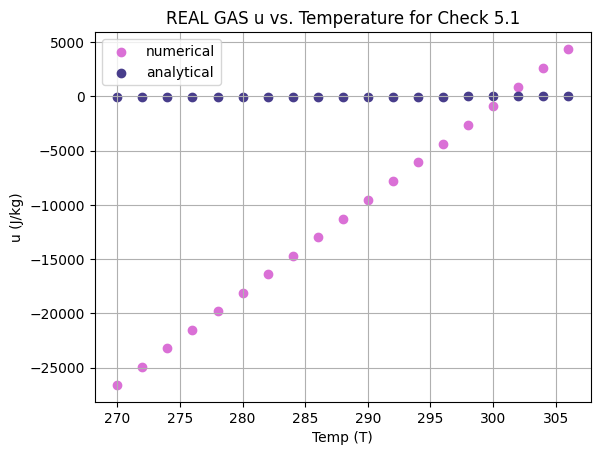

In [12]:
def solve_cp_ig_polynomial(T):
    # Polynomial coefficients
    A = 21.62
    B = 72.81
    C = -57.78  
    D = 18.3
    E = 0.0

    # Apply temperature limits
    if 150 < T and T < 310:
        T_reduced = T / 1000
        cp = (A + B * T_reduced + C * T_reduced**2 + D * T_reduced**3 + E / (T_reduced**2)) / MW  # J/(kg K)
        return cp
    raise ValueError("Temperature outside of function bounds!")

def numerical_integration_cp_poly_ig_enthalpy(T_REF, T):
    N = 1000  # Number of intervals for numerical integration
    dt = (T - T_REF) / N
    integral = 0
    for i in range(N):
        Ti = T_REF + i * dt
        Ti_next = Ti + dt
        # Midpoint for integration
        integral += solve_cp_ig_polynomial((Ti + Ti_next) / 2) * dt
    return integral


def analytical_integration_cp_poly_ig_enthalpy(T_REF, T):
    # Polynomial coefficients
    A = 21.62
    B = 72.81
    C = -57.78  
    D = 18.3
    E = 0.0

    # Apply temperature limits
    if 150 < T and T < 310:
        h_ig = (T*(12000000000000000*E - T_REF**2*(12000000000*A + 6000000*B*T_REF + 4000*C*T_REF**2 + 3*D*T_REF**3)) + T_REF*(-12000000000000000*E + T**2*(12000000000*A + 6000000*B*T + 4000*C*T**2 + 3*D*T**3)))/(12000000000*MW*T*T_REF)
        return h_ig
    raise ValueError("Temperature outside of function bounds!")


#NOTE: messed up here:
def analytical_integration_internal_energy(T_ref, T):
        # Polynomial coefficients
        A = 21.62
        B = 72.81
        C = -57.78  
        D = 18.3
        E = 0.0

        u_ig =(T*(12000000000000000*E - T_ref**2*(12000000000*A + 6000000*B*T_ref + 4000*C*T_ref**2 + 3*D*T_ref**3 - 12000000000*R_U)) + T_ref*(-12000000000000000*E + T**2*(12000000000*A + 6000000*B*T + 4000*C*T**2 + 3*D*T**3 - 12000000000*R_U)))/(12000000000*(1000*MW)*T*T_ref)
        return u_ig


def numerical_integration_cp_poly_ig_int_energy(T_REF, T):
    u_ig = numerical_integration_cp_poly_ig_enthalpy(T_REF, T) - R_U*T
    return u_ig

def analytical_integration_cp_poly_ig_int_energy(T_REF, T):
    u_ig = analytical_integration_cp_poly_ig_enthalpy(T_REF, T) - R_U*T
    return u_ig



temp_arr = [270,272,274,276,278,280,282,284,286,288,290,292,294,296,298,300,302,304,306]
h_numerical_arr = []
h_analytical_arr = []


for T in temp_arr:

    h_numerical_arr.append( numerical_integration_cp_poly_ig_int_energy(T_REF, T) )
    h_analytical_arr.append( analytical_integration_internal_energy(T_REF, T) )
        

plt.scatter(temp_arr, h_numerical_arr, label = "numerical", color = 'orchid')
plt.scatter(temp_arr, h_analytical_arr, label = "analytical", color = 'darkslateblue')

plt.xlabel('Temp (T)')
plt.ylabel('u (J/kg)')
plt.title('REAL GAS u vs. Temperature for Check 5.1')
plt.legend()
plt.grid(True)
plt.show()

Check 6.1: Comparing T_sat between preos library obj and polynomial!

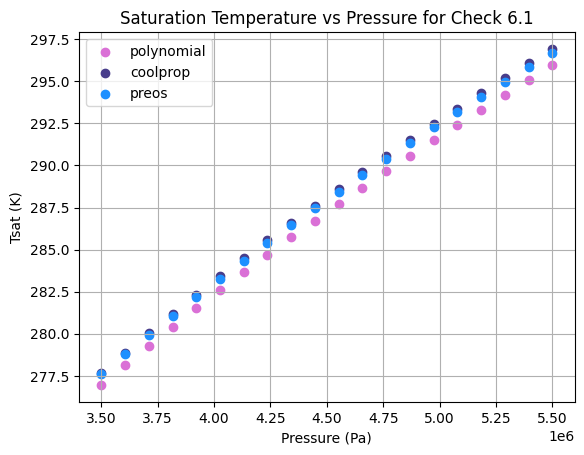

In [13]:
def T_sat_polynomial(P):
    A = 4.80716087
    B = 967.819748
    C = 19.6368887

    T_sat = B/(A -np.log10( P/100000) ) - C
    # Apply temperature limits
    if 140 < T and T < 310:
        return T_sat
    raise ValueError("Temperature outside of function bounds!")

P_arr = np.linspace(3.5e6, 5.5e6, 20)
poly_t_sat_arr = []
cool_tsat_arr = []
preos_tsat_arr = []


for P in P_arr:

    poly_t_sat_arr.append( T_sat_polynomial(P) )
    cool_tsat_arr.append( CP.PropsSI('T', 'P', P, 'Q', 0, 'N2O') )
    preos_g = PR(Tc=TC, Pc=PC, omega=OMEGA, T=T_REF, P=P)
    preos_tsat_arr.append( preos_g.Tsat(P) )



plt.scatter(P_arr, poly_t_sat_arr, label = "polynomial", color = 'orchid')
plt.scatter(P_arr, cool_tsat_arr, label = "coolprop", color = 'darkslateblue')
plt.scatter(P_arr, preos_tsat_arr, label = "preos", color = 'dodgerblue')
plt.xlabel('Pressure (Pa)')
plt.ylabel('Tsat (K)')
plt.title('Saturation Temperature vs Pressure for Check 6.1')
plt.legend()
plt.grid(True)
plt.show()

    

Check 7.1 --> du/drho|T for liquid: 

In [49]:
def analytical_integration_cp_poly_ig_enthalpy(T_REF, T):
    # Polynomial coefficients
    A = 21.62
    B = 72.81
    C = -57.78  
    D = 18.3
    E = 0.0

    # Apply temperature limits
    if 150 < T and T < 310:
        h_ig = (T*(12000000000000000*E - T_REF**2*(12000000000*A + 6000000*B*T_REF + 4000*C*T_REF**2 + 3*D*T_REF**3)) + T_REF*(-12000000000000000*E + T**2*(12000000000*A + 6000000*B*T + 4000*C*T**2 + 3*D*T**3)))/(12000000000*MW*T*T_REF)
        return h_ig
    raise ValueError("Temperature outside of function bounds!")


def analytical_integration_cp_poly_ig_int_energy(T_REF, T):
    u_ig = analytical_integration_cp_poly_ig_enthalpy(T_REF, T) - R_U*T
    return u_ig


def solve_du_drho_const_T_liq(rho,T,P):

    vm = 1/rho #multiply by MW when using SI
    print("MOLAR VOLUME: ", vm)


    preos_l = PR(Tc=TC, Pc=PC, omega=OMEGA, T=T, P=P)

    
    sqrt_two = np.sqrt(2)
    #solve a_alpha
    a_alpha = preos_l.a_alpha_pure(T)

    #if this fails try w gas constant instead of R_U
    dA_dV_const_T_l_dep = ( (R_U*T)/(vm) ) + ( (R_U*T)/(vm - b) ) - (a_alpha /( 2*sqrt_two*b) )*( (1/(vm+(1+sqrt_two)*b)) - (1/(vm+(1-sqrt_two)*b)) )

    du_dvm_const_T_l_dep = dA_dV_const_T_l_dep + P + vm*preos_l.dP_dV_l

    #convert to du_drho_const_T
    du_drho_const_T_l_dep =  (-MW)/(rho**2)*(du_dvm_const_T_l_dep)

    du_drho_const_T_l = du_drho_const_T_l_dep
    
    #du_drho_const_T_l  = preos_l.dH_dep_dV_l_T -P -vm*preos_l.dP_dV_l

    #print("checking du_drho_constT_l", du_drho_const_T_l)
    #print("checking deriv 1 and 2: ", du_drho_const_T_l, testing_deriv_second_way)

    return du_drho_const_T_l


T_REF = 200

###From NIST:
T_NIST = 284 #K
rho_NIST_0 = 852.087084084 # kg/m^3
P_NIST = 4.5e6

vm_0 = MW/rho_NIST_0 
preos_l_0 = PR(Tc=TC, Pc=PC, omega=OMEGA, T=T_NIST, V= vm_0)
P_0 = preos_l_0.P

u_ig_0 = analytical_integration_cp_poly_ig_int_energy(T_REF, T_NIST)
u_dep_0 = preos_l_0.U_dep_l
u_0 = u_ig_0 + u_dep_0/MW

delta_rho = 0.0001 #kg/m^3
rho_1 = rho_NIST_0 + delta_rho

vm_1 = MW/rho_1
preos_l_1 = PR(Tc=TC, Pc=PC, omega=OMEGA, T=T_NIST, V= vm_1)
P_1 = preos_l_1.P

u_ig_1 = analytical_integration_cp_poly_ig_int_energy(T_REF, T_NIST)
u_dep_1 = preos_l_1.U_dep_l
u_1 = u_ig_1 + u_dep_1/MW

def solve_du_drho_const_T_liq_central_differences(T, rho, delta_rho):
    # my bad guys i kept messing up the calculus
    rho_0 = rho - delta_rho
    vm_0 = MW/rho_0 
    preos_l_0 = PR(Tc=TC, Pc=PC, omega=OMEGA, T=T, V= vm_0)
    P_0 = preos_l_0.P
    u_dep_0 = preos_l_0.U_dep_l

    rho_1 = rho + delta_rho
    vm_1 = MW/rho_1
    preos_l_1 = PR(Tc=TC, Pc=PC, omega=OMEGA, T=T, V= vm_1)
    P_1 = preos_l_1.P
    u_dep_1 = preos_l_1.U_dep_l

    print("pressures check: ", P_1, P_0)
    central_difference_du_drho_const_T =  ( (u_dep_1/MW) - (u_dep_0/MW) ) / (rho_1-rho_0) #since u_ig = f(T) only, the ideal gas component is the same so take difference in departure function
    return central_difference_du_drho_const_T

delta_rho = 0.0001 #kg/m^3
central_diff_du_drho_const_T = solve_du_drho_const_T_liq_central_differences(T_NIST, rho_NIST_0, delta_rho)


NIST_APPROX_du_drho_const_T =  (u_1-u_0) / (rho_1-rho_NIST_0)


preos_du_drho_const_T = solve_du_drho_const_T_liq(rho_NIST_0,T_NIST,P_NIST)


print("numerical derivative vs central difference vs preos function for script vs my analytical derivative implementation: ", NIST_APPROX_du_drho_const_T, central_diff_du_drho_const_T, preos_du_drho_const_T)



pressures check:  5858374.933844492 5858362.658078641
MOLAR VOLUME:  0.001173588966056219
numerical derivative vs central difference vs preos function for script vs my analytical derivative implementation:  -200.73197146794158 -200.73197437832462 54.81001178166045


Conclusion from Check 7: Not sure how to get Thermo PR EOS to give correct output and had trouble with the analytical function so I will use the numerical solver I made here that matches with NIST

Check 8: investigating T_sat --> SHOULD be the same between liq and gas preos objects but a lot of things SHOULD have worked a certain way so investigating

In [15]:
P_tank = 4.5e6 #Pa

T_liq = 270.00 #K
T_gas = 300 #K 

preos_g = PR(Tc=TC, Pc=PC, omega=OMEGA, T=T_gas, P=P_tank)
T_sat_gas = preos_g.Tsat(P_tank)
    
preos_l = PR(Tc=TC, Pc=PC, omega=OMEGA, T=T_liq, P=P_tank)
T_sat_liq = preos_g.Tsat(P_tank)


print("these should be the same! ", T_sat_gas, T_sat_liq)

these should be the same!  287.94493237008703 287.94493237008703


[NOTE: UNUSED IN MODEL] Check 9: KINETIC Viscosity

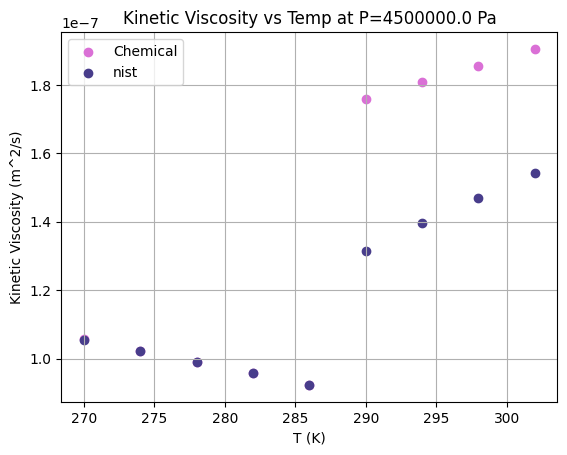

In [159]:
T_arr = [270,274,278,282,286,290,294,298,302]
#cool_visc_arr =[] - coolprop does not have a viscosity model for this fluid
chem_visc_arr =[]

P_nist= 4.5e6 #Pa
T_transition = 288.114642545 #K

dyn_visc_nist_arr = [9.85058125277e-05,9.33041389475e-05,8.81023373672e-05,8.28183444560e-05,7.73265569736e-05,1.70451314821e-05,1.70638129150e-05,1.71190505970e-05,1.71974485219e-05] #Pa*s
rho_nist_arr = [933.782754682,912.927829134,890.386257968,865.597168019,837.606521862,129.734975611,122.312722828,116.411897939,111.500779097]

kinetic_visc_nist_arr = []
i = 0
while i < len(rho_nist_arr):
    kinetic_visc_nist_arr.append( dyn_visc_nist_arr[i]/rho_nist_arr[i]  )

    i +=1

T_crash_arr = []
try:
    for T in T_arr:
        n2o = Chemical('N2O', T=T, P=P_nist)

        if T > T_transition:
            visc_chem = n2o.nug

        else: 
            visc_chem = n2o.nul
        
        T_crash_arr.append(T)
        chem_visc_arr.append(visc_chem)


except Exception as e:
    print("error!")
    print(e)



plt.scatter(T_crash_arr, chem_visc_arr, label = "Chemical", color = 'orchid')
plt.scatter(T_arr, kinetic_visc_nist_arr, label = "nist", color = 'darkslateblue')
plt.ylabel('Kinetic Viscosity (m^2/s)')
plt.xlabel('T (K)')
plt.title(f'Kinetic Viscosity vs Temp at P={P_nist} Pa')
plt.legend()
plt.grid(True)
plt.show()

Check 10: thermal conductivity

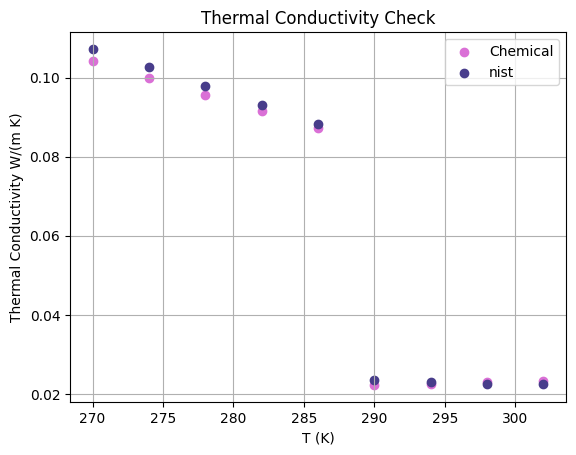

In [17]:
T_arr = [270,274,278,282,286,290,294,298,302]
chem_k_arr =[]

P_nist= 4.5e6 #Pa
T_transition = 288.114642545 #K

thermal_cond_nist_arr = [0.107247765033,0.102612798679,0.0979223787298,0.0931493373211,0.0882517101678,0.0235887970424,0.0228998070686,0.0225525314362,0.0223934406808] # (W/(m*K))

T_crash_arr = []
try:
    for T in T_arr:
        n2o = Chemical('N2O', T=T, P=P_nist)

        if T > T_transition:
            k_chem = n2o.kg

        else: 
            k_chem = n2o.kl
        
        T_crash_arr.append(T)
        chem_k_arr.append(k_chem)


except Exception as e:
    print("error!")
    print(e)



plt.scatter(T_crash_arr, chem_k_arr, label = "Chemical", color = 'orchid')
plt.scatter(T_arr, thermal_cond_nist_arr, label = "nist", color = 'darkslateblue')
plt.ylabel('Thermal Conductivity W/(m K)')
plt.xlabel('T (K)')
plt.title('Thermal Conductivity Check')
plt.legend()
plt.grid(True)
plt.show()

11) DYNAMIC Viscosity using polynomials from [7]

link to nist data: https://webbook.nist.gov/cgi/fluid.cgi?P=4.5&TLow=270&THigh=302&TInc=4&Digits=10&ID=C10024972&Action=Load&Type=IsoBar&TUnit=K&PUnit=MPa&DUnit=kg%2Fm3&HUnit=kJ%2Fkg&WUnit=m%2Fs&VisUnit=Pa*s&STUnit=N%2Fm&RefState=DEF

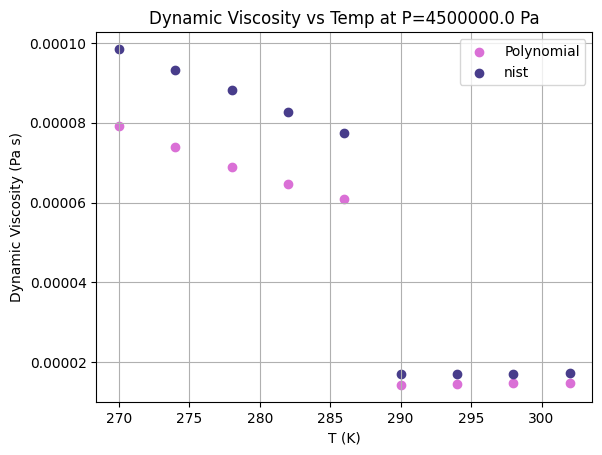

In [18]:
#from ..thermo_property_lookup.get_n2o_viscosity import get_n2o_viscosity

import numpy as np
import matplotlib.pyplot as plt
from thermo import Chemical
from thermo.eos import PR
import CoolProp.CoolProp as CP

P_nist= 4.5e6 #Pa
T_transition = 288.114642545 #K

dyn_visc_nist_arr = [9.85058125277e-05,9.33041389475e-05,8.81023373672e-05,8.28183444560e-05,7.73265569736e-05,1.70451314821e-05,1.70638129150e-05,1.71190505970e-05,1.71974485219e-05] #Pa*s

def gas_dynamic_visc_polynomial(T):
    # Polynomial coefficients
    A = 2.1150E-6
    B = 0.46420
    C = 305.70
    D = 0.0

    # Apply temperature limits
    if 182 < T and T < 1000:
        dvisc = A*T**B / ( 1 + C/T + D/T**2)
        return dvisc
    raise ValueError("Temperature outside of function bounds!")

def liq_dynamic_visc_polynomial(T):
    # Polynomial coefficients
    A = 0.001877085
    B = -1.1864E-5
    C = 1.928E-8 

    # Apply temperature limits
    if 182 < T and T < 1000:
        dvisc = A + B*T + C*T**2
        return dvisc
    raise ValueError("Temperature outside of function bounds!")


# Global Constants:
R_U = 8.31446 #J/(mol K)
n2o_g = Chemical('nitrous oxide', T=298.15)
PC = n2o_g.Pc
TC = n2o_g.Tc
OMEGA = n2o_g.omega

P_nist= 4.5e6 #Pa
T_transition = 288.114642545 #K

T_arr = [270,274,278,282,286,290,294,298,302]

poly_dyn_visc_arr = []

T_crash_arr = []
try:
    for T in T_arr:
        preos= PR(Tc=TC, Pc=PC, omega=OMEGA, T=T_liq, P=P_nist)
        
        if T > T_transition:
            #print("in gas")
            dvisc = gas_dynamic_visc_polynomial(T) 

        else: 
            #print("in liq")
            dvisc = liq_dynamic_visc_polynomial(T)
          
        T_crash_arr.append(T)
        poly_dyn_visc_arr.append(dvisc)

except Exception as e:
    print("error!")
    print(e)


plt.scatter(T_crash_arr, poly_dyn_visc_arr, label = "Polynomial", color = 'orchid')
plt.scatter(T_arr, dyn_visc_nist_arr, label = "nist", color = 'darkslateblue')
plt.ylabel('Dynamic Viscosity (Pa s)')
plt.xlabel('T (K)')
plt.title(f'Dynamic Viscosity vs Temp at P={P_nist} Pa')
plt.legend()
plt.grid(True)
plt.show()


NOTE: thesis provides the following constants:
>    A = 0.001877085 
>    B = 1.1864E-5
>    C = 1.928E-8 

    with a polynomial eqn of: 
>   dvisc = A + B*T + C*T**2

However, we are expecting dynamic viscosity of the OOM of around 1e-4, and given A is roughly 0.002, and no other constants have (-) in the equation, this does not make sense. Just to test, I tried adding (-) signs to the other terms, and I found the best correlation when I multiply the B constant by (-1). Therefore I believe that there is a sign error on the constant B in the thesis and I will proceed with the updated constant:
> B = -1.1864E-5

12) Check thesis h_lv polynomial against method I am currently using in thesis:

9 9 9


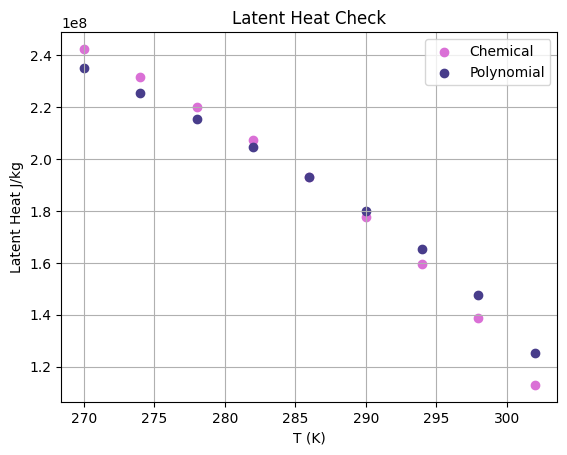

In [19]:

T_REF = 298.15 #K
n2o_g = Chemical('nitrous oxide', T=T_REF)
TC = n2o_g.Tc
MW = (n2o_g.MW/1000)

def h_latent_heat_polynomial(T):
    A = 2.686E7
    B = 0.182
    C = 0.9387
    D = -0.706
    E = 0.0

    # Apply temperature limits
    if 182 < T and T < 310:
        T_r = T/TC
        h_lv = ( A*(1-T_r)**(B + C*T_r +D*T_r**2 +E*T_r**3) )/MW
        return h_lv #J/kg
    raise ValueError("Temperature outside of function bounds!")



T_arr = [270,274,278,282,286,290,294,298,302]

P_nist= 4.5e6 #Pa

polynomial_arr = []
preos_arr = []


try:
    for T in T_arr:

        preos = PR(Tc=TC, Pc=PC, omega=OMEGA, T=T, P=P_nist)
        preos_arr.append( preos.Hvap(T)/(MW/1000) ) #NOTE: Thesis does not have the MW/1000, but I think their MW is in g/mol not kg/mol like mine so convert back

        polynomial_arr.append( h_latent_heat_polynomial(T) )

        

except Exception as e:
    print("error!")
    print(e)

print( len(preos_arr), len(polynomial_arr), len(T_arr) )


plt.scatter(T_arr, preos_arr, label = "Chemical", color = 'orchid')
plt.scatter(T_arr, polynomial_arr, label = "Polynomial", color = 'darkslateblue')
plt.ylabel('Latent Heat J/kg')
plt.xlabel('T (K)')
plt.title('Latent Heat Check')
plt.legend()
plt.grid(True)
plt.show()